**<h1 align="center">NLP Sentiment Analysis of Yelp</h1>**
## <center>Group 7: *Han Nga Chan, Honglin Jiang, Kunjingyi Chen, Yu-Fang Liao, Yumeng Tang*</center>

**GitHub Link**: https://github.com/users/Honglin-Jiang/projects/2

# **Analysis Plan**
Our project aims to leverage unstructured data containing merchants’ information and customer feedback available in Yelp reviews to achieve several key objectives listed below, benefiting both merchants and users.

For merchants, we are trying to identify areas for service improvement and customer satisfaction involving utilizing sentiment analysis to understand customer sentiment and pinpointing areas where businesses can enhance their offerings and services. Through the analysis of review data, we can uncover customer preferences and expectations, allowing businesses to adjust their strategies accordingly and ultimately improve profitability. Additionally, conducting comparative analysis can help businesses in understanding their position within the market relative to competitors.

From users’ perspective, enhancing user experience with personalized recommendations and advertisements is achieved through user segmentation based on activity and preferences, coupled with association rule mining. This approach enables the delivery of personalized recommendations and targeted advertisements if possible, ultimately improving user experience. Furthermore, improving user engagement involves segmenting users and applying association rule mining to map users with relevant businesses based on their past review behavior, fostering deeper engagement on the platform.


# **Yelp Dataset**

Dataset Link:
https://www.yelp.com/dataset

### **business.json**

Contains business data including location data, attributes, and categories.

| Column         | Description                                                |
|----------------|------------------------------------------------------------|
| business_id    | 22-character unique string business ID                      |
| name           | The business's name                                        |
| address        | The full address of the business                            |
| city           | The city where the business is located                      |
| state          | The 2-character state code, if applicable                   |
| postal_code    | The postal code of the business                              |
| latitude       | The latitude coordinate of the business                     |
| longitude      | The longitude coordinate of the business                    |
| stars          | Star rating of the business, rounded to half-stars          |
| review_count   | Number of reviews for the business                          |
| is_open        | 0 or 1 for closed or open, respectively                    |
| attributes     | Business attributes with values (some attribute values might be objects) |
| categories     | An array of strings representing business categories       |
| hours          | Operating hours for each day of the week                    |

### **review.json**

Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

| Column       | Description                                                |
|--------------|------------------------------------------------------------|
| review_id    | 22-character unique identifier for the review              |
| user_id      | 22-character unique identifier for the user                |
| business_id  | 22-character unique identifier for the business            |
| stars        | Star rating given in the review (integer)                  |
| date         | Date when the review was posted (formatted as YYYY-MM-DD) |
| text         | The content of the review                                  |
| useful       | Number of useful votes received for the review (integer)   |
| funny        | Number of funny votes received for the review (integer)    |
| cool         | Number of cool votes received for the review (integer)     |


### **user.json**

User data including the user's friend mapping and all the metadata associated with the user.

|| Column           | Description |  | |
|:----------------| :---------------- | :--------| :----: | :--------|
||user_id |22 character unique user id, maps to the user in user.json
||name| the user's first name
||review_count| the number of reviews they've written
||yelping_since| when the user joined Yelp, formatted like YYYY-MM-DD
||useful| number of useful votes sent by the user
||funny| number of funny votes sent by the user
||cool| number of cool votes received
||elite| the years the user was elite
||friends| an array of the user's friend as user_ids
||fans |number of fans the user has
||average_stars| average rating of all reviews
||compliment_hot| number of hot compliments received by the user
||compliment_more| number of more compliments received by the user
||compliment_profile| number of profile compliments received by the user
||compliment_cute| number of cute compliments received by the user
||compliment_list| number of list compliments received by the user
||compliment_note| number of note compliments received by the user
||compliment_plain| number of plain compliments received by the user
||compliment_cool| number of cool compliments received by the user
||compliment_funny| number of funny compliments received by the user
||compliment_writer| number of writer compliments received by the user
||compliment_photos| number of photos compliments received by the user

### **checkin.json**

Checkins on a business.

|| Column      | Description |  | |
|:----------------| :---------------- | :--------| :----: | :--------|
||business_id|22 character business id, maps to business in business.json
||date| a comma-separated list of timestamps for each checkin, each with format YYYY-MM-DD HH:MM:SS


### **tip.json**
Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.


|| Column           | Description |  | |
|:----------------| :---------------- | :--------| :----: | :--------|
||user_id| 22 character unique user id
||business_id|22 character unique string business id
||text| text of the tip
||date| when the tip was written, formatted like YYYY-MM-DD
||compliment_count| how many compliments it has



# Data Preprocessing

In [1]:
#Import library
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Install upgrade
!pip install --upgrade pip

In [ ]:
#Install upgrade
!pip install --upgrade setuptools

In [ ]:
#Install upgrade
!pip install mlxtend

## **1. Check-In.json**

In [ ]:
#Load in data
#checkin_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_checkin.json'
checkin_json_file_path = 'yelp_academic_dataset_checkin.json'

# List to store data from JSON file
checkin_data_list = []

# Open and read the JSON file line by line
with open(checkin_json_file_path, 'r') as file:
    for checkin_line in file:
        try:
            # Load each JSON object into a Python dictionary
            checkin_data = json.loads(checkin_line)
            checkin_data_list.append(checkin_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
checkin_df = pd.DataFrame(checkin_data_list)

checkin_df

In [ ]:
#Check the sum of null value
checkin_df.isna().sum()

Below's dataframe is for each businessId, the number of check-ins for each hour of the day. Please note that "0" is midnight, "12" is noon, "13" is 1 PM, and so on up to "23" which is 11 PM.

In [ ]:
# create a list of date-time strings
checkin_df['date_times_list'] = checkin_df['date'].str.split(', ')

# have each date-time as a separate row
checkin_df_exploded = checkin_df.explode('date_times_list')

# Convert the 'date_times_list' to datetime objects
checkin_df_exploded['date_times_list'] = pd.to_datetime(checkin_df_exploded['date_times_list'], errors='coerce')

# create new columns 'hour' and 'day_of_week'
checkin_df_exploded['hour'] = checkin_df_exploded['date_times_list'].dt.hour
checkin_df_exploded['day_of_week'] = checkin_df_exploded['date_times_list'].dt.day_name()

# get hours as columns with a count of check-ins per hour for each day of the week
checkin_df_exploded['count'] = 1
checkin_hourly_ext = checkin_df_exploded.pivot_table(index='business_id', columns=['day_of_week', 'hour'], values='count', aggfunc='sum', fill_value=0)

checkin_hourly_ext.columns = [' '.join([str(col) for col in cols]) for cols in checkin_hourly_ext.columns.values]

# add 'business_id' column again
checkin_hourly_ext.reset_index(inplace=True)

checkin_hourly_ext.head()

Below's dataframe showed the aggregate number of check-ins for each hour.

In [ ]:
#Split the data_times_list column
checkin_df['date_times_list'] = checkin_df['date'].str.split(', ')

checkin_df = checkin_df.explode('date_times_list')

checkin_df['date_times_list'] = pd.to_datetime(checkin_df['date_times_list'], errors='coerce')

# create a new column 'hour'
checkin_df['hour'] = checkin_df['date_times_list'].dt.hour

# get hours as columns with a count of check-ins per hour
checkin_df['count'] = 1
checkin_hourly = checkin_df.pivot_table(index='business_id', columns='hour', values='count', aggfunc='sum', fill_value=0)

if isinstance(checkin_hourly.columns, pd.MultiIndex):
    checkin_hourly.columns = checkin_hourly.columns.droplevel(0)

# add 'business_id' to become a column again
checkin_hourly = checkin_hourly.reset_index()

checkin_hourly.columns = ['business_id'] + [f'hour_{col}' if isinstance(col, int) else col for col in checkin_hourly.columns[1:]]

In [ ]:
checkin_hourly.head()

## **2. Tip.json**

In [ ]:
#Load in dataset
#tip_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_tip.json'
tip_json_file_path = 'yelp_academic_dataset_tip.json'

# List to store data from JSON file
tip_data_list = []

# Open and read the JSON file line by line
with open(tip_json_file_path, 'r') as file:
    for tip_line in file:
        try:
            # Load each JSON object into a Python dictionary
            tip_data = json.loads(tip_line)
            tip_data_list.append(tip_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
tip_df = pd.DataFrame(tip_data_list)

tip_df

In [ ]:
#Check null value
tip_df.isna().sum()

## **3. User.json**

In [ ]:
#Load in data
user_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_user.json'
# user_json_file_path = 'yelp_academic_dataset_user.json'

# List to store data from JSON file
user_data_list = []

# Open and read the JSON file line by line
with open(user_json_file_path, 'r') as file:
    for user_line in file:
        try:
            # Load each JSON object into a Python dictionary
            user_data = json.loads(user_line)
            user_data_list.append(user_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
user_df = pd.DataFrame(user_data_list)

user_df.head()

In [ ]:
#Check null value
user_df.isna().sum()

## **4. Review.json**

In [ ]:
#load in data
#review_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/'yelp_academic_dataset_review.json'
review_json_file_path = 'yelp_academic_dataset_review.json'

# List to store data from JSON file
review_data_list = []

# Open and read the JSON file line by line
with open(review_json_file_path, 'r') as file:
    for review_line in file:
        try:
            # Load each JSON object into a Python dictionary
            review_data = json.loads(review_line)
            review_data_list.append(review_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
review_df = pd.DataFrame(review_data_list)

review_df

In [ ]:
#Check null value
review_df.isna().sum()

In [ ]:
review_df['useful'].max()

In [ ]:
review_df.describe()

In [ ]:
review_df['date'] = pd.to_datetime(review_df['date'])
sliced = review_df[review_df['date'].dt.year >2020]

## **5. Business.json**

In [ ]:
# load and preview the data
bus = []
with open('yelp_academic_dataset_business.json') as f:
    for line in f:
        bus.append(json.loads(line))
bus = pd.DataFrame.from_dict(bus)
bus.head()

In [ ]:
bus = bus.rename(columns = {'name': 'BusinessName'})
bus

In [ ]:
print(bus.dtypes)

Check missing values

In [ ]:
missing_values = bus.isnull().sum()
missing_values

Drop rows with null values

In [ ]:
bus = bus.dropna(how='any',axis=0)
bus.isnull().sum()

#### Classify business category  by topic modeling 

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(bus.categories)

In [ ]:
nmf = NMF(n_components=15, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

In [ ]:
feature_names = nmf.get_feature_names_out()

In [ ]:
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(H):
    top_words = [feature_names[j] for j in np.argsort(topic)[:-11:-1]]
    print(top_words)

In [ ]:
# Dictionary for category mapping
category_mapping = {
    'nightlife': ['bars', 'nightlife', 'sports', 'wine', 'pubs', 'cocktail', 'beer', 'sushi', 'lounges', 'japanese'],
    'selfcare': ['spas', 'beauty', 'salons', 'hair', 'nail', 'removal', 'waxing', 'barbers', 'skin', 'day'],
    'fastfood': ['food', 'fast', 'burgers', 'restaurants', 'sandwiches', 'grocery', 'specialty', 'delis', 'chicken', 'beer'],
    'homeservice': ['services', 'home', 'estate', 'real', 'local', 'apartments', 'cleaning', 'contractors', 'garden', 'repair'],
    'autoservice': ['auto', 'automotive', 'repair', 'stations', 'change', 'oil', 'tires', 'car', 'parts', 'dealers'],
    'american': ['pizza', 'italian', 'restaurants', 'sandwiches', 'chicken', 'wings', 'salad', 'cheesesteaks', 'delis', 'seafood', 'american', 'traditional', 'new', 'restaurants', 'burgers', 'seafood', 'steakhouses', 'barbeque', 'diners', 'chicken'],
    'event': ['event', 'hotels', 'planning', 'travel', 'services', 'venues', 'spaces', 'caterers', 'party', 'arts'],
    'health': ['medical', 'health', 'dentists', 'dentistry', 'general', 'cosmetic', 'doctors', 'massage', 'surgeons', 'therapy'],
    'cafe': ['tea', 'coffee', 'food', 'donuts', 'bakeries', 'cafes', 'restaurants', 'convenience', 'desserts', 'roasteries', 'breakfast', 'brunch', 'sandwiches', 'restaurants', 'cafes', 'diners', 'salad', 'delis', 'bagels', 'bakeries'],
    'shopping': ['shopping', 'stores', 'fashion', 'clothing', 'garden', 'home', 'women', 'furniture', 'department', 'accessories'],
    'fusion': ['mexican', 'restaurants', 'chinese', 'seafood', 'tacos', 'japanese', 'tex', 'mex', 'sushi', 'asian'],
    'active': ['life', 'active', 'fitness', 'instruction', 'gyms', 'trainers', 'yoga', 'arts', 'entertainment', 'classes'],
    'dessert': ['ice', 'yogurt', 'cream', 'frozen', 'food', 'desserts', 'bakeries', 'smoothies', 'juice', 'shaved']
}

def map_categories(categories):
    categories_lower = [category.lower() for category in categories]
    mapped_categories = set()
    for category in categories_lower:
        for key, values in category_mapping.items():
            if category in values:
                mapped_categories.add(key)
    return list(mapped_categories) if mapped_categories else ['other']  # Default category for unmatched cases

# Apply the mapping function to the 'categories' column
bus['mapped_categories'] = bus['categories'].apply(lambda x: map_categories(x.split(', ')))

# Display the DataFrame with mapped categories
print(bus[['categories', 'mapped_categories']])

In [ ]:
bus['mapped_categories'] = bus['mapped_categories'].apply(lambda x: x[0] if x else 'other')

# Display the DataFrame with mapped categories
print(bus[['categories', 'mapped_categories']])

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'bus' is your DataFrame with the 'mapped_categories' column
# Count occurrences of each category
category_counts = bus['mapped_categories'].value_counts()

# Plot the distribution
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Mapped Categories')
plt.xlabel('Mapped Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
import json

bus['attributes'] = bus['attributes'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

In [ ]:
def flatten_attributes(attr_dict, prefix=''):
    """
    Flattens a nested dictionary into a flat dictionary with compound keys.

    Parameters:
    - attr_dict: The attributes dictionary.
    - prefix: A prefix for the keys to indicate nesting.

    Returns:
    - A flat dictionary with compound keys.
    """
    flat_dict = {}
    for key, value in attr_dict.items():
        new_key = f'{prefix}{key}' if prefix else key
        if isinstance(value, dict):
            flat_dict.update(flatten_attributes(value, prefix=new_key+'_'))
        else:
            flat_dict[new_key] = value
    return flat_dict

flat_attributes = bus['attributes'].apply(flatten_attributes)

# Convert the series of dictionaries to a DataFrame and join it with the bus.
attributes_df = pd.DataFrame(flat_attributes.tolist())
bus = bus.join(attributes_df)


In [ ]:
#Change the columns into boolean type
for col in attributes_df.columns:
    bus[col] = bus[col].apply(lambda x: True if x == 'True' or x == True else False if x == 'False' or x == False else x)

In [ ]:
bus

In [ ]:
bus.info()

In [ ]:
#Expand the businessparking columns
import ast
def safe_eval(dict_str):
    try:
        return ast.literal_eval(dict_str)
    except (ValueError, SyntaxError):
        return None

def flatten_business_parking(row):
    if pd.notna(row) and isinstance(row, str):
        parking_dict = safe_eval(row)
        if parking_dict and isinstance(parking_dict, dict):
            return parking_dict
    return {'garage': None, 'street': None, 'validated': None, 'lot': None, 'valet': None}

business_parking_expanded = bus['BusinessParking'].apply(flatten_business_parking)

business_parking_df = pd.DataFrame(business_parking_expanded.tolist())

business_parking_df = business_parking_df.add_prefix('BusinessParking_')

bus = bus.join(business_parking_df)

In [ ]:
bus.drop(columns=['BusinessParking'], inplace=True)

In [ ]:
bus.info()

In [ ]:
bus

In [ ]:
# Fill NaN values with False for all object-type columns
for col in bus.columns:
    if bus[col].dtype == 'object':
        bus[col] = bus[col].fillna(False)

In [ ]:
bus

Deal with Categories

In [ ]:
#Flattern categories column and get the first one in list
#bus['categories'] = bus['categories'].str.split(',').apply(lambda x: x[0].strip() if x else None)
bus['categories'] = bus['categories'].str.split(',').apply(lambda x: x[1].strip() if x and (len(x) > 1 and x[0].strip() == 'Restaurants') else x[0].strip() if x else None)

In [ ]:
#number of unique values in categoreis
len(bus['categories'].unique())

In [ ]:
bus.loc[bus['categories'] == 'Restaurants', 'categories']

Deal with hours

In [ ]:
bus['hours']

In [ ]:
#flattern the hours column into week of day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days_of_week:
    bus[day] = bus['hours'].apply(lambda x: x.get(day) if isinstance(x, dict) and day in x else None)

In [ ]:
bus.drop(columns=['hours'], inplace=True)

In [ ]:
bus

In [ ]:
bus.info()

In [ ]:
# Only look for open stores.
bus_open = bus[bus['is_open'] == 1].copy()

bus_open.reset_index(drop=True, inplace=True)


In [ ]:
bus_open

In [ ]:
# Drop the 'attributes' column
bus_open.drop(columns='attributes', inplace=True)

In [ ]:
bus_open

# **EDA**

### Check-In

In [ ]:
# Check-In.json
#Plot graph for Aggregate Number of Check-ins for Each Hour
import matplotlib.pyplot as plt


checkin_hourly.drop('business_id', axis=1, inplace=True)

hourly_sums = checkin_hourly.sum()

plt.figure(figsize=(14, 7))
plt.bar(hourly_sums.index, hourly_sums.values, color='skyblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.title('Aggregate Number of Check-ins for Each Hour')
plt.xticks(rotation=45)

# to avoid overlapping
plt.tight_layout()
plt.show()

The height of each bar reflects the number of check-ins that occurred during the respective hour. The graph shows a clear pattern of activity with the number of check-ins being highest during the late evening hours, particularly from 'hour_16' (4 PM) to 'hour_23' (11 PM). This trend suggests that the peak times for check-ins are in the late afternoon to late evening, with the highest peaks around 'hour_18' (6 PM) to 'hour_20' (8 PM). Conversely, the early morning hours, specifically from 'hour_0' (midnight) to 'hour_6' (6 AM), show the least amount of activity, which is understandable as this is typically after closing hours for many businesses or before they open.

The significant decrease in check-ins during the early hours of the morning and the gradual increase towards the evening hours could be indicative of customer behavior patterns, where customers are more likely to visit and check into places during their free time or after work hours. This data can be very useful for businesses to understand customer foot traffic patterns and could inform decisions related to opening hours, or promotional activities to increas customer visits during off-peak hours.

## Tip:

In [ ]:
# filter out the non-zero compliment count
non_zero_compliments = tip_df[tip_df['compliment_count'] > 0]

# group by business_id and sum the compliment counts
business_compliments = non_zero_compliments.groupby('business_id')['compliment_count'].sum().sort_values()

# get the first 10
top_10_business_compliments = business_compliments.nlargest(10)

#Plot graph for Top 10 Businesses by Non-Zero Compliment Count
plt.figure(figsize=(10, 6))
top_10_business_compliments.plot(kind='bar', color='skyblue')

plt.title('Top 10 Businesses by Non-Zero Compliment Count')
plt.xlabel('Business ID')
plt.ylabel('Total Compliment Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

From the above chart, we can see variability in the total compliment counts, here we only picked top 10 businesses. The business with ID starting with 'dsfRin' has the highest number of compliments, much more than the other business IDs, indicating a particularly positive reception from customers. Following this, the total compliments decrease but remain relatively high for the other two businesses (IDs starting with 'FExW' and 'KeH6'), showing that they also have a considerable amount of positive feedback from their customers on Yelp.

This graph can be especially useful for businesses and analysts aiming to identify which establishments are performing well in terms of customer satisfaction, as indicated by the volume of compliments. It can also serve as a benchmark for other businesses to gauge the level of positive engagement they might aspire to. Additionally, the chart could inform customers about popular businesses among their peers, potentially guiding their choices and expectations.

## User:

In [ ]:
# For each type of count, find the top 10 users including their names
top_useful = user_df.nlargest(10, 'useful')[['user_id', 'name', 'useful']]
top_funny = user_df.nlargest(10, 'funny')[['user_id', 'name', 'funny']]
top_cool = user_df.nlargest(10, 'cool')[['user_id', 'name', 'cool']]

# Displaying the top 10 for each category
print("Top 10 Users for 'Useful' Compliments:")
print(top_useful)
print("\nTop 10 Users for 'Funny' Compliments:")
print(top_funny)
print("\nTop 10 Users for 'Cool' Compliments:")
print(top_cool)

In [ ]:
#Plot graph
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 'useful'
top_useful.plot(kind='bar', x='name', y='useful', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Users by "Useful" Compliments')
axes[0].set_xlabel('User Name')
axes[0].set_ylabel('Count of Useful Compliments')

# 'funny'
top_funny.plot(kind='bar', x='name', y='funny', ax=axes[1], color='orange')
axes[1].set_title('Top 10 Users by "Funny" Compliments')
axes[1].set_xlabel('User Name')
axes[1].set_ylabel('Count of Funny Compliments')

# 'cool'
top_cool.plot(kind='bar', x='name', y='cool', ax=axes[2], color='green')
axes[2].set_title('Top 10 Users by "Cool" Compliments')
axes[2].set_xlabel('User Name')
axes[2].set_ylabel('Count of Cool Compliments')

plt.tight_layout()
plt.show()

In the first chart in color of blue, we can see the count of 'Useful' compliments for each of the top 10 users. The user named Fox has the highest number of useful compliments, significantly more than the rest of the users on Yelp, which could indicate that Fox's contributions are considered particularly valuable by others. Following Fox, Bruce and Michael have the next highest counts, but with fewer compliments than Fox, suggesting they are also providing beneficial content to others.

The second chart colored in orange showed users who have received the most 'Funny' compliments. According to the chart, Fox still in the lead, followed by Bruce and Michael, implying that the contributions from these top users are not only helpful but also entertaining.

The green chart analyzed 'Cool' compliments in user dataset. Again, Fox tops the chart, followed by Bruce and Michael. These users are perceived as cool by their peers, indicating that their behavior or content has a certain appeal that resonates well within their community.

Across all three charts, a interesting finding is that the same users appear, which suggests that these individuals are influential within their community, contributing content that is consistently recognized as useful, funny, and cool. This information can be used by the platform to encourage further engagement by identifying potential influencers on Yelp.

## Review:

In [ ]:
#plot histogram for the distribution of stars for businesses
import seaborn as sns

sns.histplot(review_df['stars'], kde=False)
plt.title('Distribution for stars of businesses')
plt.show()

From the above plot, we can see that 1-star ratings is relatively low, suggesting that there are fewer reviews with the lowest possible rating, indicating that while some users are dissatisfied, they are not the majority. The 2-star rating also has a low count, slightly higher than the 1-star, but still among the lower frequencies. This suggests a similar level of dissatisfaction as with the 1-star ratings. The 3-star ratings have a slightly higher frequency than the 2-star ratings, indicating a moderate level of satisfaction or an average rating. The count for 4-star ratings increases significantly, suggesting that many users found their experience to be good but not excellent.

There is a significant jump in the frequency of 5-star ratings, having the highest number of reviews, almost 200,000. This high level of satisfaction among users or customers suggests that the majority of the user group on Yelp had a very positive experience during their visit.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(24,8))

axes2 = plt.subplot(2,2,1)
axes2 = sns.countplot(x='cool', data=review_df)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,2)
axes3 = sns.countplot(x='useful', data=review_df)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,3)
axes4 = sns.countplot(x='funny', data=review_df)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

### Business:

Overview about data

In [ ]:
print(bus_open.describe())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Plot for Distribution of Star Ratings
sns.histplot(bus_open['stars'], bins=5, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.show()
#Plot for Distribution of Review Counts
sns.histplot(bus_open['review_count'], kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

**Summary:**

- Most businesses receive ratings of 4.0 or 5.0 stars, with these being the most common ratings given by customers.

- Lower star ratings (1.0 to 3.5) are less common.

- The majority of businesses have a relatively low number of reviews, but there is a wide range in the number of reviews that businesses receive.

- Both charts together suggest that while customers generally tend to leave positive ratings, businesses often struggle to accumulate a large number of reviews.

In [ ]:
#Plot for Top 20 States by Number of Businesses
plt.figure(figsize=(10, 8))
sns.countplot(y='state', data=bus_open, order=bus_open['state'].value_counts().index[:20])
plt.title('Top 20 States by Number of Businesses')
plt.show()

In [ ]:
#Plot for I can Top 20 Categories of Businesses
plt.figure(figsize=(10, 8))
sns.countplot(y='categories', data=bus_open, order=bus_open['categories'].value_counts().index[:20])
plt.title('Top 20 Categories of Businesses')
plt.show()


**Summary:**

- Pennsylvania is the leading state in terms of the number of businesses

- Restaurants are the most common type of business in this yelp dataset, with Hair Salons being the least common within the top twenty.

- Both charts provide a clear visual representation of the distribution of businesses across states and business categories, respectively.

- There appears to be a significant drop in the number of businesses after the first few top states and categories, indicating that a small number of states and categories dominate the business landscape in terms of numbers.

Star Ratings vs. Review Counts

Explore if there's a relationship between the number of reviews a business has and its average star rating.

In [ ]:
#Plot for Review Count vs. Star Ratings
sns.scatterplot(x='review_count', y='stars', data=bus_open, alpha=0.5)
plt.xscale('log')
plt.title('Review Count vs. Star Ratings')
plt.xlabel('Review Count (Log Scale)')
plt.ylabel('Star Ratings')
plt.show()


**Summary:**

- There appears to be a higher density of data points (more reviews) between the 3.0 and 5.0 star rating range. This suggests that there are more businesses with higher star ratings than there are with lower star ratings.

- There are businesses with very high review counts across all rating levels, which are outliers when compared to the general trend of fewer reviews. This might suggest that some businesses, regardless of their star rating, can still attract a large number of reviews.

- The majority of businesses have a relatively low number of reviews, and a small number of businesses have a very high number of reviews, which is typical in many review distributions.

- Since the data points are evenly spread across different review counts for each star rating, it indicates that customers are inclined to leave reviews irrespective of whether their experience was positive or negative.

- Besides above, there is no strong evidence from this plot to suggest a direct correlation between the number of reviews a business has and its average star rating. Businesses with both high and low star ratings can have varying numbers of reviews.

Investigate if certain categories of businesses tend to have higher or lower average star ratings.

In [ ]:
#Star Ratings by Top 10 Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='stars', y='categories', data=bus_open, order=bus_open['categories'].value_counts().index[:10])
plt.title('Star Ratings by Top 10 Categories')
plt.show()


**Summary:**

- The data suggests that Restaurants and Food-related businesses tend to have higher average star ratings compared to other categories.

- Event Planning & Services, Health & Medical, and Nightlife have lower average ratings.

- Shopping, Beauty & Spas, Home Services, and Automotive services have moderate to high average ratings but also show considerable variability in ratings, as indicated by the error bars.

- The presence of outliers, especially in Nightlife and Beauty & Spas, suggests that there may be some extreme experiences (both positive and negative) that are not captured by the average rating alone.

### Association Rule

In [ ]:
#Slice the required column from different tables
bus_cat = bus_open[['business_id','categories']]
user_id_name = user_df[['user_id', 'name']]
review_id = review_df[['user_id', 'business_id']]

In [ ]:
#merge and slice the require columns for performing association rules are being used for
cat_id = bus_cat.merge(review_id, how = 'left', on = 'business_id')
cat_id = cat_id[['user_id','categories']]

In [ ]:
#group the categories of restaurant the each user use to comment on
cat_group = cat_id.groupby('user_id')['categories'].apply(list)
cat_group = pd.DataFrame(cat_group).reset_index()
cat_group

In [ ]:
#import library for association rule and apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
resto = cat_group['categories']
resto

In [ ]:
#Transforming data into needed format for apriori and association rule out
te = TransactionEncoder()
te_data = te.fit(resto).transform(resto)
df_trans = pd.DataFrame(te_data, columns=te.columns_)
df_trans

In [ ]:
#build flat list
flat_list = [item for sublist in resto for item in sublist]
flat_list[0:10]

In [ ]:
# count item purchase volume
item_counts = {}
for item in flat_list:
    item_counts[item] = item_counts.get(item, 0) +1

In [ ]:
sorted_item =sorted(item_counts.items(), key = lambda x: x[1], reverse = True)
sorted_item[0:5]

In [ ]:
#percentile_index = int(0.05 * len(sorted_item))
#percentile_item = sorted_item[percentile_index]
#print(f"25th percentile item: {percentile_item}")

In [ ]:
#setting minimum support as 25th percentile of all support
#min_support = flat_list.count(percentile_item[0]) / len(flat_list)
min_support = 0.001

In [ ]:
from scipy.sparse import csr_matrix
sparse_df = csr_matrix(df_trans.values)

frequent_categories = apriori(df_trans, min_support = min_support, use_colnames = True)
frequent_categories

In [ ]:
#Generating rules
rules = association_rules(frequent_categories, metric = 'confidence', min_threshold = 0.1)
rules.sort_values(by = 'confidence')

In [ ]:
categories = set(flat_list)
categories

In [ ]:
# top 5 reccomendition
top_recommendations = {}
for category in categories:
    relevant_rules = rules[rules['antecedents'].apply(lambda x: category in x)]
    if not relevant_rules.empty:
        sorted_rules = relevant_rules.sort_values(by='confidence', ascending=False).head(5)
        unique_consequents = set(sorted_rules['consequents'].explode())
        top_recommendations[category] = list(unique_consequents)

In [ ]:
for category, recommendations in top_recommendations.items():
    print(f"People that review {category} will also review {recommendations}")

We run a market basket analysis on user’s review behavior for business categories. We found that the categories with the most support are “ Food”, “Nightlife”, “Pizza”. And we discovered that users that used to review “Pizza” are more likely to review “Food”, user that review “Food” are more likely to review “Nightlife”, and “Bars”.

# User segmentation

In [6]:
sampled_user_df = user_df.sample(frac=0.01, random_state=42)
sampled_user_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1635733,QQaKfSyWbzZTVqUuIoefow,Corrin,2,2015-08-03 00:00:35,4,1,0,,"UHYW5gz-n-VnRv4k0NLgZQ, EzAnwduLSyO62kb-O0NK5Q...",1,...,0,0,0,0,0,0,0,0,0,0
1563281,epRxgIf-3HAJggkp4OSFtA,Lois,1,2016-11-13 16:35:24,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
4352,dkcKCYISLc9nGfgMJ5ZitA,Desiree,26,2011-01-15 19:28:26,18,0,3,,"e9QIeB_tgzXTCKmrvzQJiw, AaDd1GNo_0Du3lXg_cD7cw...",3,...,0,0,0,0,3,0,1,1,0,0
1336240,yUyveO0V0BxSklVauJvD0g,Gary,1,2015-06-04 15:21:26,1,0,1,,None,0,...,0,0,0,0,1,0,0,0,0,0
1337407,txOVgP4grDuL2PjbQX3Bxw,Shawne,2,2015-09-13 01:17:40,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930607,b307Nw805D4UudhgDXsjMg,A,45,2010-07-02 14:14:37,48,11,11,,None,0,...,1,0,0,0,1,0,0,0,0,0
1522643,9tn5iL62hnUqmvcrAzFBZA,C,4,2014-05-05 15:20:27,2,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1358189,hPOIhnKlnCZumG5E2xkWlg,Walton,2,2012-02-01 20:34:17,3,1,1,,None,0,...,0,0,0,0,1,0,0,0,0,0
1137448,dGaJAoLQioUcO_9lYpfvzw,Kate,4,2015-04-15 02:30:45,8,0,0,,None,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [8]:
# Data cleaning of 'elite' and 'friends'

# Count the number of elite years
sampled_user_df['elite_count'] = sampled_user_df['elite'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Count the number of friends
sampled_user_df['friends_count'] = sampled_user_df['friends'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

user_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Latest 'yelping_since' in user_df
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'])
latest_yelping_since_user = user_df['yelping_since'].max()
print("Latest Yelping Since Date and Time:", latest_yelping_since_user)

# Latest 'date' in review_df
review_df['date'] = pd.to_datetime(review_df['date'])
latest_review_date = review_df['date'].max()
print("Latest Review Date and Time:", latest_review_date)

# Latest 'date' in tip_df
tip_df['date'] = pd.to_datetime(tip_df['date'])
latest_tip_date = tip_df['date'].max()
print("Latest Tip Date and Time:", latest_tip_date)

Latest Yelping Since Date and Time: 2022-01-19 17:15:47


NameError: name 'review_df' is not defined

From the above data, it is evident that the latest date in the dataset is 2022-01-19. Therefore, we will consider the data to be collected on this day to calculate the 'days since using Yelp' for users.

In [ ]:
sampled_user_df['yelping_since'] = pd.to_datetime(sampled_user_df['yelping_since'])

# Consider "2022-01-19" as the date when the data was collected.
reference_date = pd.to_datetime('2022-01-19')

# Calculate the number of days since 'yelping_since' to 2022-01-19
sampled_user_df['days_since_yelping'] = (reference_date - sampled_user_df['yelping_since']).dt.days

sampled_user_df

In [ ]:
sampled_user_df_new = sampled_user_df.drop(['user_id', 'yelping_since','elite', 'friends'], axis =1)
sampled_user_df_new

In [ ]:
sampled_user_df_new.columns

In [ ]:
numerical_columns = ['review_count', 'useful', 'funny', 'cool', 'fans',
                     'average_stars', 'compliment_hot', 'compliment_more',
                     'compliment_profile', 'compliment_cute', 'compliment_list',
                     'compliment_note', 'compliment_plain', 'compliment_cool',
                     'compliment_funny', 'compliment_writer', 'compliment_photos',
                     'elite_count', 'friends_count', 'days_since_yelping']

numerical_data = sampled_user_df_new[numerical_columns]

scaler = StandardScaler()
standardize_df = pd.DataFrame(scaler.fit_transform(numerical_data), columns = numerical_data.columns)

standardize_df_others = standardize_df.copy().drop('review_count', axis =1)

# Apply PCA to find the optimal number of dimensions
pca = PCA()
pca.fit(standardize_df_others)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Heatmap
pca.components_.shape

df_components = pd.DataFrame(pca.components_, columns = standardize_df_others.columns)

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.6)
sns.heatmap(df_components, annot=True, )

Note:

Please note that px plot are not shown on SSC, see appendix for more information about following px plots. We would try other method to display the px graph in SSC for our next steps.

In [ ]:
columns_of_interest = ['useful', 'fans', 'average_stars']
target_of_interest = 'review_count'

In [ ]:
standardize_df

In [ ]:
df_numeric_corrected_3D = pd.DataFrame(standardize_df[columns_of_interest])
df_numeric_corrected_3D[target_of_interest] = standardize_df[target_of_interest]
df_numeric_corrected_3D

In [ ]:
fig = px.scatter_3d(df_numeric_corrected_3D, x=columns_of_interest[0], y=columns_of_interest[1], z=columns_of_interest[2], color=target_of_interest)
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
standardize_df_3D = pd.DataFrame(pca.transform(standardize_df_others)[:, 0:3], columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(standardize_df_3D, x='PC1', y='PC2', z='PC3',)
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
standardize_df_3D_with_targets = pd.concat([standardize_df_3D, standardize_df['review_count']], axis = 1)

fig = px.scatter_3d(standardize_df_3D_with_targets, x='PC1', y='PC2', z='PC3', color = 'review_count')
fig.update_traces(marker_size = 3)
fig.show()

The primary contributors to PC1 are compliment profile, compliment note, compliment plain, compliment cool, compliment note, compliment funny, and compliment writer. PC2 is predominantly influenced by compliment cute and compliment hot. PC3 is primarily shaped by days since yelping and average stars.

In the context of clustering based on review count, the principal variation among clusters is observed in PC1. Consequently, the most influential variables for distinguishing clusters are found in compliment profile.

## K-Means

In [ ]:
# Elbow Plot
pca = PCA(n_components=3)
principal_components = pca.fit_transform(standardize_df_others)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Combine principal_df with the original DataFrame
standardize_df_kmeans = pd.concat([standardize_df, principal_df], axis=1)

# Fit K-Means for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    kmeans.fit(standardize_df_kmeans[['PC1', 'PC2', 'PC3']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

We have chosen a cluster count of 2 after considering the elbow plot displayed above.

In [ ]:
# K-Means
kmeans = KMeans(2, random_state=42, n_init=1)
cluster_labels = kmeans.fit_predict(standardize_df_kmeans[['PC1', 'PC2', 'PC3']])
standardize_df_kmeans['cluster_labels'] = cluster_labels

fig = px.scatter_3d(standardize_df_kmeans, x='PC1', y='PC2', z='PC3', color='cluster_labels', opacity=0.9,
                    title='K-Means Clustering Results',
                    labels={'cluster_labels': 'Cluster'})
fig.show()

In [ ]:
# Show all features in the hover legend
standardize_df_kmeans['text'] = standardize_df_kmeans[numerical_columns].astype(str).agg(' '.join, axis=1)

fig = px.scatter_3d(standardize_df_kmeans, x='compliment_profile', y='compliment_note', z='compliment_plain',
                    color='cluster_labels', opacity=0.9,
                    title='K-Means Clustering Results With All Numberical Features',
                    labels={'cluster_labels': 'Cluster'},
                    hover_data=numerical_columns)

fig.update_traces(marker=dict(size=8))
fig.show()

The graph indicates that the most distinctive differences between clusters lie in the "compliment profile" and "compliment note" aspects.

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Hierarchical clustering
Z = linkage(standardize_df[columns_of_interest], 'ward')
dendrogram(Z, p=4, truncate_mode='level', leaf_rotation=90, leaf_font_size=5, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

## T-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne_embedding = TSNE(n_components=3).fit_transform(standardize_df)
df_embeddings_with_categorical_and_targets = pd.concat([pd.DataFrame(tsne_embedding, columns=['tSNE1', 'tSNE2', 'tSNE3']), standardize_df_others , standardize_df['review_count']], axis=1)

In [ ]:
df_embeddings_with_categorical_and_targets

In [ ]:
# perplexity = 1
tsne_perplex_1 = TSNE(n_components=3, perplexity=1).fit_transform(standardize_df)
df_perplex_1_targets = pd.concat([pd.DataFrame(tsne_perplex_1, columns=['tSNE1', 'tSNE2', 'tSNE3']), standardize_df_others , standardize_df['review_count']], axis=1)

fig = px.scatter_3d(df_perplex_1_targets,x= 'tSNE1', y= 'tSNE2', z='tSNE3', color = 'review_count', hover_data = standardize_df_others)
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
# perplexity = 30
tsne_perplex_30 = TSNE(n_components=3, perplexity=30).fit_transform(standardize_df)
df_perplex_30_targets = pd.concat([pd.DataFrame(tsne_perplex_30, columns=['tSNE1', 'tSNE2', 'tSNE3']), standardize_df_others , standardize_df['review_count']], axis=1)

fig = px.scatter_3d(df_perplex_30_targets,x= 'tSNE1', y= 'tSNE2', z='tSNE3', color = 'review_count', hover_data = standardize_df_others)
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
# perplexity = 50
tsne_perplex_50 = TSNE(n_components=3, perplexity=50).fit_transform(standardize_df)
df_perplex_50_targets = pd.concat([pd.DataFrame(tsne_perplex_50, columns=['tSNE1', 'tSNE2', 'tSNE3']), standardize_df_others , standardize_df['review_count']], axis=1)

fig = px.scatter_3d(df_perplex_50_targets,x= 'tSNE1', y= 'tSNE2', z='tSNE3', color = 'review_count', hover_data = standardize_df_others)
fig.update_traces(marker_size = 3)
fig.show()

# Business Segmentation

In [ ]:
#Drop Unnecessary columns to prepare for clustering
bus_df = bus_open.drop(columns = ['business_id','address', 'city', 'state', 'is_open','postal_code','BusinessName'])

In [ ]:
#Check unique value for all column that is object
df_categorical = bus_df.select_dtypes(include=['object'])
unique = df_categorical.apply(lambda col: col.unique())
pd.DataFrame(unique)

Given the above table, expanding the attributes bring new unique values. Hence we would like to clean the 'None'  value to become False.

In [ ]:
#Replace the None value as False to retain only true and false value
for col in bus_df.columns:
    if bus_df[col].dtype == 'object':
        bus_df[col] = bus_df[col].replace('None', False)

In [ ]:
#Check unique value for all column that is object again
df_categorical = bus_df.select_dtypes(include=['object'])
unique = df_categorical.apply(lambda col: col.unique())
pd.DataFrame(unique)

This value contains too many different unique value, and is contain in different format which is too difficult to be cleaned. Hence in this stage we choose to drop these columns.

In [ ]:
#Drop the object column
df_categorical = bus_df.select_dtypes(include=['object'])
bus_clean = bus_df.drop(columns = df_categorical.columns)

In [ ]:
bus_clean.info()

In [ ]:
#Perform standardization on numerical variables
df_num = bus_df[['latitude','longitude','stars','review_count']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized_data = sc.fit_transform(df_num)

df_normalized = pd.DataFrame(normalized_data, columns=df_num.columns)

df_normalized.describe()

In [ ]:
#Include all columns in boolean as categorical data
df_cat = bus_clean.select_dtypes(include=['bool'])

In [ ]:
#Combine both numerical data and categorical data into one dataframe
bus_clean = pd.concat([df_normalized, df_cat], axis = 1)

This business dataset contains numerous categorical variables that record various features of the businesses, leading us to retain these variables in our analysis. Since the dataset comprises both numerical and categorical data, we opted to utilize KPrototypes instead of KMeans, as KPrototypes supports clustering with both data types.

In [ ]:
#Install Kmodes
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In practice, we have tried to run an elbow plot to choose the optimal K. However, as it requires you over an hour for the code to finished the execution, we give up plotting the graph and choose number of clusters to be 3 instead following normal practice.

In [ ]:
# Initialize KPrototypes with desired parameters
kproto = KPrototypes(n_clusters=3, init='random', verbose=2, random_state = 42)

# Fit and predict clusters
clusters = kproto.fit_predict(bus_clean, categorical=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

# Print the cluster centroids
print(kproto.cluster_centroids_)

In [ ]:
#Get the clustering labels
bus_clean['cluster_labels'] = kproto.labels_

In [ ]:
#Pairplot of numerical data in different labels
bus_fin = bus_clean[['longitude','latitude','stars','review_count','cluster_labels']]
import seaborn as sns
sns.pairplot(hue='cluster_labels', data = bus_fin)

Regarding numerical data, clustering tends to mirror the geographical distribution of businesses. Cluster 0 predominantly represents businesses in the upper-middle part of the map, while cluster 1 is skewed towards the upper-left part, and cluster 2 towards the lower part. Apart from geographical distribution of businesses, review_count also show effect on clustering. Higher review_count tend to be in cluster 2, while the lower review_count tend to be in cluster 1 and cluster 2 depending on their geographical location.

As the pairplot can only explain the cluster for the numerical variables. Hence, to get to know more about the combination of attributes in each cluster that affect the clustering, we will use association rules to see the differences.

In [ ]:
# Count the number of True values for each columnist
true_counts = bus_clean.eq(True).sum()

# Display the result
print(true_counts)

As some of the features are common for different restaurants, hence including those features in computing the association rules might not be useful, as it would be common across different cluster. Hence we choose to drop the attitude that was True for more than 20% of the business.

In [ ]:
#Preparing data set for apriori and association rule
bus_asso = bus_clean.drop(columns = ['latitude','longitude','stars','review_count','BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsTakeOut','GoodForKids','RestaurantsGoodForGroups'])
bus_0 = bus_asso[bus_clean['cluster_labels'] == 0].drop(columns = 'cluster_labels')
bus_1 = bus_asso[bus_clean['cluster_labels'] == 1].drop(columns = 'cluster_labels')
bus_2 = bus_asso[bus_clean['cluster_labels'] == 2].drop(columns = 'cluster_labels')

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#Apriori for finding frequent set
frequent_0 = apriori(bus_0, min_support=0.01,use_colnames=True).sort_values(by = 'support', ascending= False)
frequent_1 = apriori(bus_1, min_support=0.01,use_colnames=True).sort_values(by = 'support', ascending= False)
frequent_2 = apriori(bus_2, min_support=0.01,use_colnames=True).sort_values(by = 'support', ascending= False)
display(frequent_0 , frequent_1, frequent_2)

In [ ]:
#Generating association rules
bus0_r = association_rules(frequent_0, metric="support", min_threshold=0.01).sort_values(by="support", ascending=False)
bus1_r = association_rules(frequent_1, metric="support", min_threshold=0.01).sort_values(by="support", ascending=False)
bus2_r = association_rules(frequent_2, metric="support", min_threshold=0.01).sort_values(by="support", ascending=False)
display(bus0_r.head(10),bus1_r.head(10),bus2_r.head(10))

For different label, the most common combination of features are having restaurants delivery and has TV within the restaurants. From the third most common combinations, different clusters tend to have different popular combination of features. For the cluster 0, which are the business in upper middle part of US, having OutdoorSeating is more common than the other two clusters. For cluster 1 and 2, Caters is more common to be seen in the businesses.

# Next Steps:
After conducting a thorough user segmentation analysis, our next focus is to delve deeper into market segmentation and conduct sentiment analysis on customer reviews.

We will begin by leveraging Natural Language Processing (NLP) techniques to break down and analyze textual data, including customer reviews and business categories. Our objective is to perform sentiment analysis on reviews and utilize clustering to explore associations between businesses and customer emotions or specific keywords. This approach aims to identify keywords commonly associated with businesses, helping us understand user search behavior and preferences when seeking businesses to visit.

For our initial analysis, we conducted a basic clustering on the businesses dataset to explore potential segments within the market based on various attributes and features. However, we faced limitations in including certain features, such as the categories of restaurants, which encompassed up to 1109 unique categories and we are unable to include it in our analysis. The challenge arose from the fact that a single business could fall into multiple categories while in the data cleaning process, we opted to select the first category in the list to represent each business. This approach caused some problems, for instance, businesses categorized as both cafes and food establishments, both falling under the broader category of restaurants, were treated as separate entities. We implemented an initial treatment by negating ‘Restaurants’ and picked the next category attribute as the primary category. This approach enhanced our association rule to an extent. However, there is still the lingering problem that categories like ‘Food’ still dominate the overall category.

As we proceed with our analysis, we aim to leverage Natural Language Processing (NLP) techniques to identify similar categories and group them together to form more distinct business types. This will enhance the significance of our clustering analysis, allowing us to consider not only business attributes but also their types and associations. Given the abundance of categorical variables in our dataset, we may explore alternative methods such as Multiple Correspondence Analysis (MCA) for categorical variables and Principal Component Analysis (PCA) for numerical variables. This will help us assess whether our clustering approach can be further refined and improved.


# NLP for Review.json

In [ ]:
!pip install gensim
!pip install nltk
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import nltk
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

#### Pre-processing

Cleaning up and tokenizing...

In [ ]:
review_df['date'] = pd.to_datetime(review_df['date'])
sliced = review_df[review_df['date'].dt.year >2020]

sliced

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
338961,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
341768,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
343516,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15
344290,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
347458,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
...,...,...,...,...,...,...,...,...,...
434848,-AUV8Crcc7jTQq69wmtPnA,-GuODgw91nz0HaJGBd3wCw,NnHfPMXbY7IQI24lcYXKiQ,2.0,0,0,0,This place is just very okay when it comes to ...,2021-01-06 21:53:21
434849,xKd9IYFJ0o81nsZ2_qOJAQ,gx2KhvZBUtMa1D7PtfdkNQ,8ZY4F9_Drrjk7e79BWEwoQ,5.0,0,0,0,This staff is amazing! I went in on Saturday n...,2021-01-25 17:51:19
434850,aA8r4LzafBXw3GemhI4LZA,HjCh-JtBQwQbZSPN5-Fqwg,fGYnHzFr1z2kv7bPRW6VMA,5.0,0,0,0,Highly recommend this off the main drag restau...,2021-02-15 00:40:30
434851,-WtlQCn0oCQVyTwdyB63Ig,xttYXDJT9JokoiSTpirmjQ,q2N2KLhAeD0c0p-ryI3uDg,4.0,2,0,1,I'm a firm believer in second chances. I hit u...,2021-01-31 00:05:17


In [ ]:
sliced['useful'].max()

179

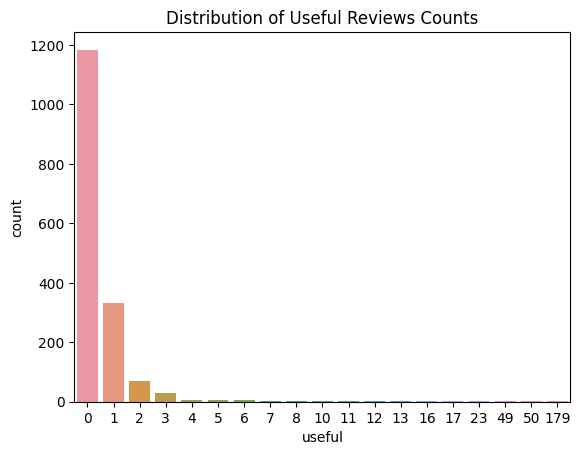

In [ ]:
ax = sns.countplot(x='useful', data=sliced)
ax.set_title('Distribution of Useful Reviews Counts')
ax.set_ylabel('count')
plt.show()

We are trying to classify them to a binary categorical variable: if the number of useful votes received for the review is greater or equal to 1, it will be "useful," represented by 1; otherwise, it will be classified as "not useful," represented by 0. We add it as a new column called "label" in dataset:

In [ ]:
sliced['label'] = (sliced['useful'] >= 1).astype(int)

/scratch/235991.1.ood/ipykernel_1619513/3399816307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced['label'] = (sliced['useful'] >= 1).astype(int)


In [ ]:
sliced

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
338961,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,0
341768,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,0
343516,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15,0
344290,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45,0
347458,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03,0
...,...,...,...,...,...,...,...,...,...,...
434848,-AUV8Crcc7jTQq69wmtPnA,-GuODgw91nz0HaJGBd3wCw,NnHfPMXbY7IQI24lcYXKiQ,2.0,0,0,0,This place is just very okay when it comes to ...,2021-01-06 21:53:21,0
434849,xKd9IYFJ0o81nsZ2_qOJAQ,gx2KhvZBUtMa1D7PtfdkNQ,8ZY4F9_Drrjk7e79BWEwoQ,5.0,0,0,0,This staff is amazing! I went in on Saturday n...,2021-01-25 17:51:19,0
434850,aA8r4LzafBXw3GemhI4LZA,HjCh-JtBQwQbZSPN5-Fqwg,fGYnHzFr1z2kv7bPRW6VMA,5.0,0,0,0,Highly recommend this off the main drag restau...,2021-02-15 00:40:30,0
434851,-WtlQCn0oCQVyTwdyB63Ig,xttYXDJT9JokoiSTpirmjQ,q2N2KLhAeD0c0p-ryI3uDg,4.0,2,0,1,I'm a firm believer in second chances. I hit u...,2021-01-31 00:05:17,1


Is the dataset balanced?

In [ ]:
value_counts = sliced["label"].value_counts()

percentages = sliced["label"].value_counts(normalize=True) * 100

pd.DataFrame({
    'Counts': value_counts,
    '%': percentages
})

,Counts,%
label,,
0,1184,71.714113
1,467,28.285887


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

sliced["text_prcessed"] = sliced["text"].str.lower()

sliced["text_prcessed"] = sliced["text_prcessed"].replace('<br />', ' ', regex=True)

sliced["text_prcessed"] = sliced["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)


tokenized_reviews = [word_tokenize(review) for review in sliced["text_prcessed"]]

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
for indx, tokens in enumerate(tokenized_reviews):
  tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]


sliced["tokenized"] = tokenized_reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ba820/tangyum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/ba820/tangyum/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/scratch/235991.1.ood/ipykernel_1619513/1048554754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced["text_prcessed"] = sliced["text"].str.lower()
/scratch/235991.1.ood/ipykernel_1619513/1048554754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
sliced.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label,text_prcessed,tokenized
338961,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,0,i ve been eating at this restaurant for over 5...,"[eating, restaurant, 5, years, staple, abs, fa..."
341768,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,0,how does a delivery person from here get lost ...,"[delivery, person, get, lost, heard, google, m..."
343516,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15,0,i wish i was still a sierra resident they re ...,"[wish, still, sierra, resident, definitely, on..."
344290,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45,0,the service is always good the employees are ...,"[service, always, good, employees, nice, vegan..."
347458,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03,0,two words whipped feta \nexplosion of amazi...,"[two, words, whipped, feta, explosion, amazing..."


### Vectorize:

Build the word embedding model.

In [ ]:
# build own model
model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=50, window=5, min_count=5, workers=2) # epochs= 50 # window= when the model is trained, we consider the total of 7 words
model_word2vec = model_word2vec.wv

# Or load a pre-trained model
# model_word2vec = api.load('glove-wiki-gigaword-50') # glove-wiki-gigaword-50 # word2vec-google-news-300

Get the word embeddings.

In [ ]:
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)


embeddings = []
for review in tokenized_reviews:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/ba820/tangyum/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
embeddings.shape

(1651, 50)

In [ ]:
embeddings

array([[ 0.07968862, -0.04638077,  0.09254012, ..., -0.35994849,
         0.38872409,  0.09190074],
       [ 0.07469132, -0.04276871,  0.0906851 , ..., -0.34733394,
         0.37477853,  0.08398223],
       [ 0.07476348, -0.04857087,  0.08711258, ..., -0.32178029,
         0.34432441,  0.08029408],
       ...,
       [ 0.06270592, -0.04133266,  0.08161178, ..., -0.30334867,
         0.32494928,  0.07649445],
       [ 0.05625146, -0.03420363,  0.06773921, ..., -0.26243635,
         0.27943131,  0.06861685],
       [ 0.07881081, -0.04341474,  0.08503136, ..., -0.33357608,
         0.3545513 ,  0.09310486]])

### Classify

#### Without dealing with imbalanced data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, sliced['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_word2vec_classification = LogisticRegression(max_iter=1000, class_weight='balanced')

model_word2vec_classification.fit(X_train_scaled, y_train)

y_pred2 = model_word2vec_classification.predict(X_test_scaled)

f1_score_weighted = f1_score(y_test, y_pred2, average='weighted')
print(f"F1 Score (Weighted): {f1_score_weighted}")

print(classification_report(y_test, y_pred2))

F1 Score (Weighted): 0.581846210348163
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       239
           1       0.33      0.58      0.42        92

    accuracy                           0.56       331
   macro avg       0.55      0.56      0.53       331
weighted avg       0.65      0.56      0.58       331



#### Dealing with imbalance data:

In this phase, since we are aware of the potential problem generated by imbalanced dataset, where 71.714% of the reviews are classified as useful and 28.286% as not useful, we use the *Balanced Bagging Classifier* to addresses the problem of imbalanced data by using random under sampling to balance the class distribution in each subset. This helps us to reduce the bias towards the majority class and improve the performance on the minority class, not usefule reviews.

We also use *ADASYN* to balance our dataset by oversampling the minority class, generating a more balanced set of training data for effective model training, especially in cases of class imbalance.

#### Using ADASYN:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, sliced['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
adasyn = ADASYN(random_state=42)

X_train_scaled = scaler.fit_transform(X_train)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

model_word2vec_classification = LogisticRegression(max_iter=1000, class_weight='balanced')

model_word2vec_classification.fit(X_train_adasyn, y_train_adasyn)

X_test_scaled = scaler.transform(X_test)

y_pred2 = model_word2vec_classification.predict(X_test_scaled)

f1_score_weighted = f1_score(y_test, y_pred2, average='weighted')
print(f"F1 Score (Weighted): {f1_score_weighted}")

print(classification_report(y_test, y_pred2))
pd.DataFrame(confusion_matrix(y_test, y_pred2, normalize='true'), columns=model_word2vec_classification.classes_, index=model_word2vec_classification.classes_)

F1 Score (Weighted): 0.5818061185580617
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       239
           1       0.33      0.57      0.42        92

    accuracy                           0.56       331
   macro avg       0.55      0.56      0.53       331
weighted avg       0.65      0.56      0.58       331



,0,1
0,0.556485,0.443515
1,0.434783,0.565217


#### Using Balanced Bagging Classifier:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, sliced['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_word2vec_classification = BalancedBaggingClassifier(n_estimators=100, random_state=42)

model_word2vec_classification.fit(X_train_scaled, y_train)

y_pred2 = model_word2vec_classification.predict(X_test_scaled)

f1_score_value = f1_score(y_test, y_pred2, average='weighted')
print(f"F1 Score (Weighted): {f1_score_value}")

print(classification_report(y_test, y_pred2))
pd.DataFrame(confusion_matrix(y_test, y_pred2, normalize='true'), columns=model_word2vec_classification.classes_, index=model_word2vec_classification.classes_ )

F1 Score (Weighted): 0.6169792687090313
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       239
           1       0.33      0.42      0.37        92

    accuracy                           0.60       331
   macro avg       0.54      0.55      0.54       331
weighted avg       0.64      0.60      0.62       331



,0,1
0,0.673640,0.326360
1,0.576087,0.423913


#### Prediction:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings)

all_predictions = model_word2vec_classification.predict(X_scaled)

sliced['predicted_usefulness'] = all_predictions
sliced

/scratch/235877.1.ood/ipykernel_23254/1933126501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced['predicted_usefulness'] = all_predictions


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label,text_prcessed,tokenized,predicted_usefulness
338961,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,0,i ve been eating at this restaurant for over 5...,"[eating, restaurant, 5, years, staple, abs, fa...",0
341768,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,0,how does a delivery person from here get lost ...,"[delivery, person, get, lost, heard, google, m...",0
343516,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15,0,i wish i was still a sierra resident they re ...,"[wish, still, sierra, resident, definitely, on...",0
344290,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45,0,the service is always good the employees are ...,"[service, always, good, employees, nice, vegan...",0
347458,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03,0,two words whipped feta \nexplosion of amazi...,"[two, words, whipped, feta, explosion, amazing...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434848,-AUV8Crcc7jTQq69wmtPnA,-GuODgw91nz0HaJGBd3wCw,NnHfPMXbY7IQI24lcYXKiQ,2.0,0,0,0,This place is just very okay when it comes to ...,2021-01-06 21:53:21,0,this place is just very okay when it comes to ...,"[place, okay, comes, taste, portion, size, sma...",0
434849,xKd9IYFJ0o81nsZ2_qOJAQ,gx2KhvZBUtMa1D7PtfdkNQ,8ZY4F9_Drrjk7e79BWEwoQ,5.0,0,0,0,This staff is amazing! I went in on Saturday n...,2021-01-25 17:51:19,0,this staff is amazing i went in on saturday n...,"[staff, amazing, went, saturday, needing, brid...",0
434850,aA8r4LzafBXw3GemhI4LZA,HjCh-JtBQwQbZSPN5-Fqwg,fGYnHzFr1z2kv7bPRW6VMA,5.0,0,0,0,Highly recommend this off the main drag restau...,2021-02-15 00:40:30,0,highly recommend this off the main drag restau...,"[highly, recommend, main, drag, restaurant, ad...",0
434851,-WtlQCn0oCQVyTwdyB63Ig,xttYXDJT9JokoiSTpirmjQ,q2N2KLhAeD0c0p-ryI3uDg,4.0,2,0,1,I'm a firm believer in second chances. I hit u...,2021-01-31 00:05:17,1,i m a firm believer in second chances i hit u...,"[firm, believer, second, chances, hit, hotbox,...",1


#### Using TFiDF to vectorize:

In [ ]:
tfidf_model = TfidfVectorizer(norm=None)

tfidf_model.fit(sliced.text)

df_tfidf_transformed = tfidf_model.transform(sliced.text)
tfidf_vectors = pd.DataFrame(df_tfidf_transformed.toarray(), columns=tfidf_model.get_feature_names_out())
tfidf_vectors

,00,000,00am,00pm,01,05,10,100,1000,101,...,zip,zircon,zone,zones,zoomed,zucchini,zukababy,zukka,zukku,³ordered
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.770685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, sliced['label'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tfidf_classifier = BalancedBaggingClassifier(n_estimators=100, random_state=42)
tfidf_classifier.fit(X_train_scaled, y_train)

y_pred = tfidf_classifier.predict(X_test_scaled)

f1_score_value = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1_score_value}")

print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=tfidf_classifier.classes_, index=tfidf_classifier.classes_ )

F1 Score (Weighted): 0.6854383416683713
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       239
           1       0.43      0.49      0.46        92

    accuracy                           0.68       331
   macro avg       0.61      0.62      0.62       331
weighted avg       0.69      0.68      0.69       331



,0,1
0,0.753138,0.246862
1,0.510870,0.489130


#### Using Bag of Words:

In [ ]:
cv = CountVectorizer() #tokenizer= lambda x: word_tokenize(x), stop_words='english'

cv.fit(sliced.text)

print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

number of `tokens` 9242


{'ve': 8777,
 'been': 910,
 'eating': 2726,
 'at': 666,
 'this': 8294,
 'restaurant': 6838,
 'for': 3349,
 'over': 5771,
 'years': 9181,
 'and': 474,
 'it': 4363,
 'is': 4352,
 'staple': 7773,
 'in': 4169,
 'me': 5102,
 'abs': 208,
 'my': 5413,
 'families': 3106,
 'lives': 4824,
 'really': 6616,
 'good': 3625,
 'quality': 6504,
 'even': 2942,
 'better': 970,
 'prices': 6357,
 'can': 1385,
 'eat': 2720,
 'here': 3913,
 'without': 9096,
 'getting': 3557,
 'the': 8259,
 'gyoza': 3765,
 'sauce': 7105,
 'so': 7569,
 'could': 2047,
 'drink': 2637,
 'don': 2566,
 'typically': 8577,
 'order': 5719,
 'crunchy': 2159,
 'rolls': 6960,
 'but': 1309,
 'theirs': 8263,
 'isn': 4359,
 'traditional': 8462,
 'roll': 6956,
 'with': 9094,
 'snow': 7565,
 'crab': 2084,
 'crunchies': 2158,
 'has': 3836,
 'spicy': 7704,
 'shrimp': 7385,
 'stick': 7832,
 'delicious': 2328,
 'little': 4816,
 'spot': 7725,
 'how': 4052,
 'does': 2550,
 'delivery': 2341,
 'person': 6028,
 'from': 3444,
 'get': 3554,
 'lost': 488

In [ ]:
dtm = cv.transform(sliced.text)
bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
bow

,00,000,00am,00pm,01,05,10,100,1000,101,...,zip,zircon,zone,zones,zoomed,zucchini,zukababy,zukka,zukku,³ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1648,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    bow, sliced['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bow_classifier = BalancedBaggingClassifier(n_estimators=100, random_state=42)
bow_classifier.fit(X_train_scaled, y_train)

y_pred = bow_classifier.predict(X_test_scaled)

f1_score_value = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1_score_value}")

print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=bow_classifier.classes_, index=bow_classifier.classes_ )

F1 Score (Weighted): 0.6854383416683713
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       239
           1       0.43      0.49      0.46        92

    accuracy                           0.68       331
   macro avg       0.61      0.62      0.62       331
weighted avg       0.69      0.68      0.69       331



,0,1
0,0.753138,0.246862
1,0.510870,0.489130


# Sentiment Analysis

### Tokenization of reviews

In [ ]:
samp_w2f = sliced.copy()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
samp_w2f["text_prcessed"] = samp_w2f["text"].str.lower()
samp_w2f["text_prcessed"] = samp_w2f["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def process_text(text):
  tokenized_abstract = word_tokenize(text)
  tokenized_abstract = [word for word in tokenized_abstract if word not in stop_words]
  tokenized_abstract = [stemmer.stem(word) for word in tokenized_abstract]
  tokenized_abstract = [lemmatizer.lemmatize(word) for word in tokenized_abstract]
  return tokenized_abstract

### Vectorization using Word2Vec

In [ ]:
tokenized = samp_w2f["text_prcessed"].apply(process_text)
samp_w2f['tokenized'] = tokenized

In [ ]:
#pip install -U gensim

In [ ]:
# Either build your own model (pros and cons?)
model_word2vec = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=2) # negative=50 , epochs=50, vector_size=300
model_word2vec = model_word2vec.wv

In [ ]:
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

embeddings = []
for review in tokenized_reviews:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

### Sentimental analysis

In [ ]:
ideal_pos = pd.read_excel('pos_words.xlsx')
ideal_neg = pd.read_excel('neg_words.xlsx')
ideal_pos = ideal_pos.rename(columns = {'abound':'text'})
ideal_neg = ideal_neg.rename(columns = {'abnormal':'text'})
display(ideal_pos, ideal_neg)

In [ ]:
def sentiment(review):
  return model_word2vec.n_similarity(review, ideal_pos) - model_word2vec.n_similarity(review, ideal_neg)

In [ ]:
embed_df = pd.DataFrame(embeddings)
embed_df

In [ ]:
sentiment_score = samp_w2f['tokenized'].apply(lambda x: sentiment(x))

In [ ]:
sentiment_score.hist(bins=100)

In [ ]:
samp_w2f['senti_score'] = sentiment_score
mean_score = samp_w2f.groupby('business_id')['senti_score'].apply(np.mean).reset_index(name='mean_senti_score')
mean_score

In [ ]:
score_bus = mean_score.merge(bus_open, how = 'inner', on = 'business_id')
stars_score = score_bus[['stars','senti_score']]

In [ ]:
sns.boxplot(x = 'stars', y = 'senti_score', data = samp_w2f)
plt.title('Sentiment vs. Star Ratings by reviews')
plt.show()

In [ ]:
sns.boxplot(x = 'stars', y = 'senti_score', data = stars_score)
plt.title('Sentiment vs. Star Ratings by Business')
plt.show()

## Topic Modeling for keywords for each businesses 

In [ ]:
df = sliced[['business_id','text']].sort_values(by = 'business_id').head(60000)
df_key = pd.DataFrame(df['business_id'].unique())

In [ ]:
import pandas as pd
# Get the first 60,000 rows sorted by 'business_id'
df = sliced[['business_id', 'text']].sort_values(by='business_id').head(60000)

# Get unique business_ids
unique_business_ids = df['business_id'].unique()

# Create an empty list to store DataFrames
dfs = []

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit TF-IDF vectorizer to all text data
X = vectorizer.fit_transform(df['text'])

# Initialize NMF model
nmf = NMF(n_components=4, random_state=42)

# Iterate over unique business_ids
for business_id in unique_business_ids:
    # Subset the DataFrame for the current business_id
    df_subset = df[df['business_id'] == business_id]
    
    # Transform text data for the current business_id
    X_subset = vectorizer.transform(df_subset['text'])
    
    # Apply NMF to the subset
    W = nmf.fit_transform(X_subset)
    H = nmf.components_
    feature_names = vectorizer.get_feature_names_out()
    
    # Extract top words for each topic
    top_words = [feature_names[j] for j in np.argsort(H[0])[:-11:-1]]
    
    # Create DataFrame with 'business_id' and keywords
    df_key = pd.DataFrame({'business_id': [business_id], 'keywords': [top_words]})
    
    # Append DataFrame to the list
    dfs.append(df_key)

# Concatenate DataFrames in the list
df_key = pd.concat(dfs, ignore_index=True)

In [ ]:
df_key

## Keywords Analysis Based On Sentiment Analysis

In [ ]:
rev_samp_senti = samp_w2f.copy()
rev_samp_senti = rev_samp_senti.drop('Unnamed: 0', axis = 1)
rev_samp_senti["sentiment_score"] = sentiment_score
rev_samp_senti

In [ ]:
# Extract positive and negative reviews based on sentiment scores
positive_reviews = rev_samp_senti[rev_samp_senti['sentiment_score'] > 0]
negative_reviews = rev_samp_senti[rev_samp_senti['sentiment_score'] < 0]

positive_words = [word for review in positive_reviews['tokenized'] for word in review]
negative_words = [word for review in negative_reviews['tokenized'] for word in review]

positive_word_freq = pd.Series(positive_words).value_counts()
negative_word_freq = pd.Series(negative_words).value_counts()

# Extract the top keywords
top_positive_keywords = positive_word_freq.head(10).reset_index()
top_negative_keywords = negative_word_freq.head(10).reset_index()

top_positive_keywords.columns = ['Word', 'Frequency']
top_negative_keywords.columns = ['Word', 'Frequency']

# Calculate percentage for positive keywords
top_positive_keywords['Percentage'] = (top_positive_keywords['Frequency'] / len(positive_words)) * 100

# Calculate percentage for negative keywords
top_negative_keywords['Percentage'] = (top_negative_keywords['Frequency'] / len(negative_words)) * 100

print("Top Keywords in Positive Reviews:")
print(top_positive_keywords)
print("\nTop Keywords in Negative Reviews:")
print(top_negative_keywords)

In [ ]:
# Extract the actual reviews for the top positive and negative keywords
positive_keyword_reviews = positive_reviews[positive_reviews['tokenized'].apply(lambda x: any(word[0] in x for word in top_positive_keywords))]
negative_keyword_reviews = negative_reviews[negative_reviews['tokenized'].apply(lambda x: any(word[0] in x for word in top_negative_keywords))]

print("Positive Keyword Reviews:")
print(positive_keyword_reviews[['text', 'sentiment_score']])
print("\nNegative Keyword Reviews:")
print(negative_keyword_reviews[['text', 'sentiment_score']])

In [ ]:
# Extract context around keywords
def extract_context(reviews, keywords_of_interest, window_size=3):
    context_list = []
    for review in reviews['tokenized']:
        for i, word in enumerate(review):
            if word in keywords_of_interest:
                start = max(0, i - window_size)
                end = min(len(review), i + window_size + 1)
                context = review[start:end]
                # Exclude the keyword of interest itself
                context_list.extend([w for w in context if w != word])
    return context_list

# Keywords of interest
positive_keywords_of_interest = ['great', 'friendly', 'like', 'love', 'good', 'best']
negative_keywords_of_interest = ['wait', 'slow', 'bad', 'poor', 'rude', 'horrible', 'dirty', 'mess', 'awful', 'noise','terrible']

positive_contexts = extract_context(positive_reviews, positive_keywords_of_interest)
negative_contexts = extract_context(negative_reviews, negative_keywords_of_interest)

positive_df = pd.DataFrame(positive_contexts, columns=['Positive Context'])
negative_df = pd.DataFrame(negative_contexts, columns=['Negative Context'])

# Frequency and order
positive_freq_order = positive_df['Positive Context'].value_counts().reset_index()
positive_freq_order.columns = ['Positive Context', 'Frequency']
positive_freq_order['Percentage'] = (positive_freq_order['Frequency'] / positive_freq_order['Frequency'].sum()) * 100

negative_freq_order = negative_df['Negative Context'].value_counts().reset_index()
negative_freq_order.columns = ['Negative Context', 'Frequency']
negative_freq_order['Percentage'] = (negative_freq_order['Frequency'] / negative_freq_order['Frequency'].sum()) * 100

print("Ordered Positive Contexts:")
print(positive_freq_order)
print("\nOrdered Negative Contexts:")
print(negative_freq_order)

In [ ]:
# Monthly average sentiment score over time
rev_samp_senti['date'] = pd.to_datetime(rev_samp_senti['date'])
rev_samp_senti.set_index('date', inplace=True)

monthly_sentiment = rev_samp_senti.resample('M')['sentiment_score'].mean()

plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o')
plt.title('Monthly Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

It's evident that the sentiment scores we calculated align with the ratings given by users in their reviews. A higher sentiment score, indicating greater satisfaction, correlates with a higher number of stars in the rating.

In [ ]:
# Review length vs. sentiment score
rev_samp_senti['review_length'] = rev_samp_senti['text'].apply(len)

plt.scatter(rev_samp_senti['review_length'], rev_samp_senti['sentiment_score'])
plt.title('Review Length vs. Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

In [ ]:
#Create Word cloud
positive_text = ' '.join(rev_samp.loc[sentiment_score > 0.1, 'text_prcessed'])
negative_text = ' '.join(rev_samp.loc[sentiment_score < -0.1, 'text_prcessed'])

wordcloud_positive = WordCloud(width=1200, height=800, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=1200, height=800, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

In [ ]:
# Extremely positive and negative
extremely_positive_text = ' '.join(rev_samp_senti.nlargest(1000, 'sentiment_score')['text_prcessed'])
extremely_negative_text = ' '.join(rev_samp_senti.nsmallest(1000, 'sentiment_score')['text_prcessed'])

wordcloud_positive_top1000 = WordCloud(width=1200, height=800, background_color='white').generate(extremely_positive_text)
wordcloud_negative_top1000 = WordCloud(width=1200, height=800, background_color='white').generate(extremely_negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive_top1000, interpolation='bilinear')
plt.title('Word Cloud for Extremely Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative_top1000, interpolation='bilinear')
plt.title('Word Cloud for Extremely Negative Reviews')
plt.axis('off')

plt.show()

Examining reviews with the top 1000 sentiment scores, indicating high satisfaction compared to others in the dataset, reveals that reviewers frequently highlight aspects such as food, service, and the overall restaurant experience. Conversely, for reviews with the top 1000 negative sentiment scores, indicating high dissatisfaction, there is a common trend of commenting on various aspects including food, service, order, and time.

# Reference:
https://www.datacamp.com/tutorial/wordcloud-python